## Notebook to combine a1355e and 3ada8b RT files into one spreadsheet for Kurt 

### David.J.Caldwell 7.14.2018



In [1]:

import numpy as np
import scipy
from scipy.io import loadmat
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns; sns.set()

sns.set_context("poster") # this makes things large 

%matplotlib inline



In [33]:
### decide whether or not to save figures and data for MATLAB

saveFig = False
saveMat = False

In [3]:
### import the .mat data files
mat1 = loadmat('a1355e_compareResponse_block_1_changePts_noDelay',squeeze_me=1)
mat2 = loadmat('a1355e_compareResponse_block_3_changePts_noDelay',squeeze_me=1)
mat3 = loadmat('a1355e_compareResponse_block_4_changePts_noDelay',squeeze_me=1)
mat4 = loadmat('3ada8b_compareResponse_block_1_changePts_noDelay',squeeze_me=1)
mat5 = loadmat('3ada8b_compareResponse_block_2_changePts_noDelay',squeeze_me=1)

In [4]:
### extract variables of interest
### respLo = the minimum response time
### respHi = the maximum response time

respLo = 150 # minimum response time - 150 ms
respHi = 1000 # maximum response time - 1000 ms

button1 = mat1['buttonLocs']
button2 = mat2['buttonLocs']
button3 = mat3['buttonLocs']
button4 = mat4['buttonLocs']
button5 = mat5['buttonLocs']


In [5]:
### prepare for pandas data frame

a = np.arange(0,button1.shape[0])
ndata1 = {n: 1e3*button1[n] for n in a}
a = np.arange(0,button2.shape[0])
ndata2 = {n: 1e3*button2[n] for n in a}
a = np.arange(0,button3.shape[0])
ndata3 = {n: 1e3*button3[n] for n in a}
a = np.arange(0,button4.shape[0])
ndata4 = {n: 1e3*button4[n] for n in a}
a = np.arange(1,button5.shape[0])
ndata5 = {n: 1e3*button5[n] for n in a} # ignore null from this data file

In [7]:
### make pandas dataframes

dataFdict1 = pd.DataFrame.from_dict(ndata1,orient='columns')
dataFdict2 = pd.DataFrame.from_dict(ndata2,orient='columns')
dataFdict3 = pd.DataFrame.from_dict(ndata3,orient='columns')
dataFdict4 = pd.DataFrame.from_dict(ndata4,orient='columns')
dataFdict5 = pd.DataFrame.from_dict(ndata5,orient='columns')


In [17]:
### assign columns for dataframes

### a1355e

dataFdict1.columns = ['haptic','null','off-target','2000 uA 100 ms','1000 uA 200 ms','1500 uA 200 ms','1000 uA 300 ms']
dataFdict2.columns = ['1250 uA 200 ms','2 @ 3000 uA, 38 @ 1250 uA']
dataFdict3.columns = ['1500 uA 200 ms','2 @ 3000 uA, 38 @ 1500 uA']

dataMelt1 = pd.melt(dataFdict1)
dataMelt1['Subject'] = '1'
dataMelt1['block'] = '1'

dataMelt2 = pd.melt(dataFdict2)
#dataMelt1['Subject'] = 'a1355e'
dataMelt2['Subject'] = '1'
dataMelt2['block'] = '2'
               
dataMelt3 = pd.melt(dataFdict3)
#dataMelt2['Subject'] = 'a1355e'
dataMelt3['Subject'] = '1'
dataMelt3['block'] = '3'

### 3ada8b
### assign columns for dataframes

dataFdict4.columns = ['haptic','null','off-target','1250 uA 200 ms','800 uA 200 ms','3000 uA 200 ms','2 @ 3000 uA, 38 @ 1250 uA','2 @ 3000, 38 @ 800 uA']
dataFdict5.columns = ['2 @ 3000 uA, 38 @ 1250 uA','2 @ 3000 uA']


dataMelt4 = pd.melt(dataFdict4)
dataMelt4['Subject'] = '2'
dataMelt4['block'] = '1'
               
dataMelt5 = pd.melt(dataFdict5)
dataMelt5['Subject'] = '2'
dataMelt5['block'] = '2'


### now clean them all up
dataMelt1.rename(columns = {'variable':'experiment','value':'response time (ms)'}, inplace = True)
dataMelt2.rename(columns = {'variable':'experiment','value':'response time (ms)'}, inplace = True)
dataMelt3.rename(columns = {'variable':'experiment','value':'response time (ms)'}, inplace = True)
dataMelt4.rename(columns = {'variable':'experiment','value':'response time (ms)'}, inplace = True)
dataMelt5.rename(columns = {'variable':'experiment','value':'response time (ms)'}, inplace = True)


In [18]:
### concatenate

frames = [dataMelt1,dataMelt2,dataMelt3,dataMelt4,dataMelt5]

result = pd.concat(frames)
result
resultTrim = result[(result['response time (ms)'] < respHi) & (result['response time (ms)'] > respLo)]
resultTrim.groupby(['experiment','Subject','block']).mean()

response time (ms)
experiment                Subject block                    
1000 uA 200 ms            1       1              843.939840
1000 uA 300 ms            1       1              638.115840
1250 uA 200 ms            1       2              511.185920
                          2       1              350.954732
1500 uA 200 ms            1       1              440.967168
                                  3              457.850880
2 @ 3000 uA               2       2              411.486569
2 @ 3000 uA, 38 @ 1250 uA 1       2              463.564800
                          2       1              362.606833
                                  2              284.231078
2 @ 3000 uA, 38 @ 1500 uA 1       3              432.411569
2 @ 3000, 38 @ 800 uA     2       1              468.061623
2000 uA 100 ms            1       1              401.504256
3000 uA 200 ms            2       1              271.128576
haptic                    1       1              315.484160
                          2       1              190.303573
off-target                1       1              439.336960

In [19]:
### look at various metrics of interest

dataCleaned = resultTrim
#dataCleaned = resultTrim[resultTrim['experiment'].isin(experimentsOfInt)]
dataCleaned.groupby(['experiment','Subject','block']).mean()
dataCleaned.groupby(['experiment','Subject','block']).describe()
dataCleaned.groupby(['Subject','experiment']).describe().round()

#dataCleaned.groupby(['Subject','experiment']).mean()
#dataCleaned.groupby(['Subject','experiment']).std()

# get counts of each type
#dataCleaned.groupby(['Subject','experiment']).count()

response time (ms)                       \
                                               count   mean    std    min   
Subject experiment                                                          
1       1000 uA 200 ms                           1.0  844.0    NaN  844.0   
        1000 uA 300 ms                           9.0  638.0  166.0  459.0   
        1250 uA 200 ms                           8.0  511.0   76.0  375.0   
        1500 uA 200 ms                          33.0  448.0  102.0  267.0   
        2 @ 3000 uA, 38 @ 1250 uA                8.0  464.0  190.0  221.0   
        2 @ 3000 uA, 38 @ 1500 uA               13.0  432.0  116.0  214.0   
        2000 uA 100 ms                          20.0  402.0   94.0  280.0   
        haptic                                  20.0  315.0  100.0  171.0   
        off-target                               1.0  439.0    NaN  439.0   
2       1250 uA 200 ms                          13.0  351.0   73.0  254.0   
        2 @ 3000 uA                             17.0  411.0   67.0  256.0   
        2 @ 3000 uA, 38 @ 1250 uA               34.0  323.0  133.0  219.0   
        2 @ 3000, 38 @ 800 uA                    7.0  468.0  114.0  331.0   
        3000 uA 200 ms                          20.0  271.0   99.0  164.0   
        haptic                                  12.0  190.0   40.0  153.0   

                                                               
                                     25%    50%    75%    max  
Subject experiment                                             
1       1000 uA 200 ms             844.0  844.0  844.0  844.0  
        1000 uA 300 ms             518.0  629.0  723.0  980.0  
        1250 uA 200 ms             476.0  523.0  548.0  623.0  
        1500 uA 200 ms             394.0  432.0  476.0  763.0  
        2 @ 3000 uA, 38 @ 1250 uA  368.0  421.0  505.0  834.0  
        2 @ 3000 uA, 38 @ 1500 uA  370.0  414.0  461.0  626.0  
        2000 uA 100 ms             314.0  416.0  460.0  608.0  
        haptic                     241.0  305.0  368.0  541.0  
        off-target                 439.0  439.0  439.0  439.0  
2       1250 uA 200 ms             310.0  322.0  383.0  519.0  
        2 @ 3000 uA                396.0  410.0  442.0  523.0  
        2 @ 3000 uA, 38 @ 1250 uA  249.0  268.0  347.0  796.0  
        2 @ 3000, 38 @ 800 uA      398.0  422.0  541.0  645.0  
        3000 uA 200 ms             240.0  251.0  262.0  629.0  
        haptic                     164.0  173.0  208.0  268.0

In [20]:
# get counts of each type
dataCleaned.groupby(['Subject','experiment']).count()

response time (ms)  block
Subject experiment                                          
1       1000 uA 200 ms                              1      1
        1000 uA 300 ms                              9      9
        1250 uA 200 ms                              8      8
        1500 uA 200 ms                             33     33
        2 @ 3000 uA, 38 @ 1250 uA                   8      8
        2 @ 3000 uA, 38 @ 1500 uA                  13     13
        2000 uA 100 ms                             20     20
        haptic                                     20     20
        off-target                                  1      1
2       1250 uA 200 ms                             13     13
        2 @ 3000 uA                                17     17
        2 @ 3000 uA, 38 @ 1250 uA                  34     34
        2 @ 3000, 38 @ 800 uA                       7      7
        3000 uA 200 ms                             20     20
        haptic                                     12     12

C:\Users\djcald.CSENETID\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the swarmplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


Text(0.5,1,'')

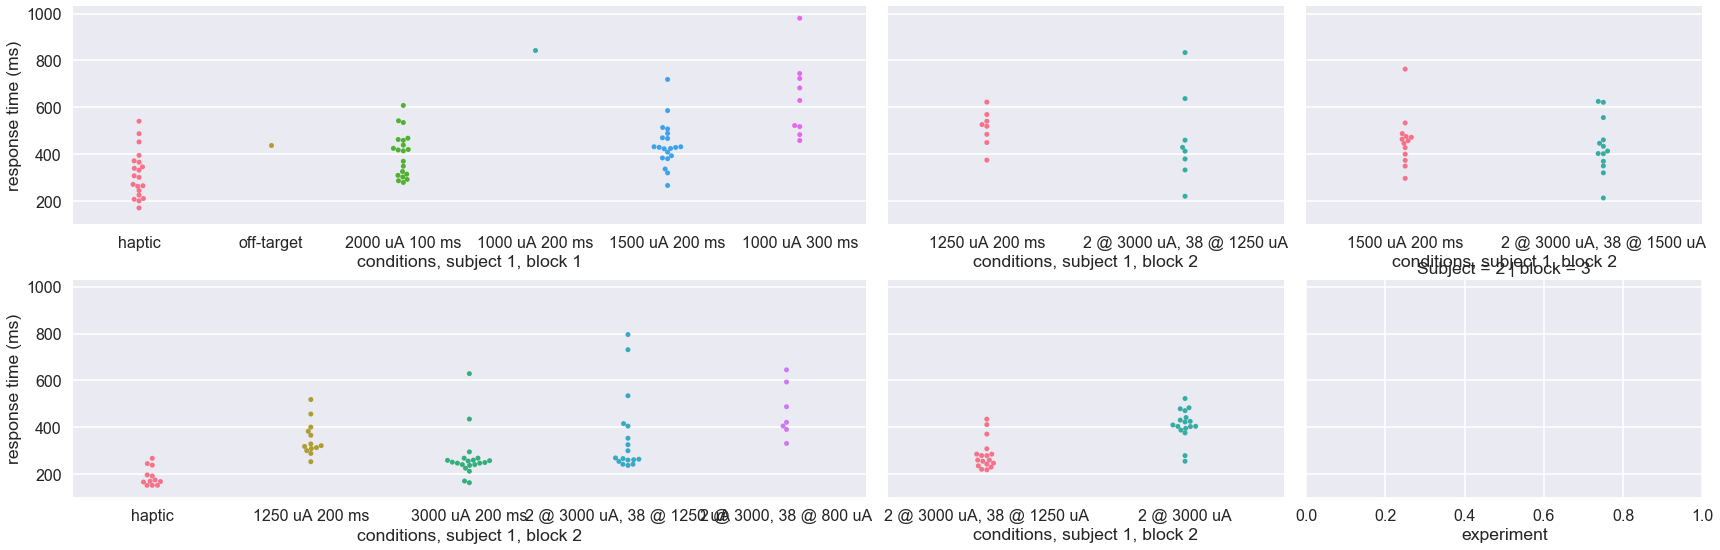

In [32]:
frameIndividual = sns.FacetGrid(data=dataCleaned[dataCleaned,row='Subject',col='block',size=4, aspect=2,sharex=False,sharey=True,gridspec_kws={"width_ratios": [4, 2,2]})
#frameIndividual.map(sns.swarmplot,'experiment','response time (ms)','typeOrder')

frameIndividual.map(sns.swarmplot,'experiment',"response time (ms)",palette='husl')
frameIndividual.axes[0,0].set_xlabel('conditions, subject 1, block 1')
frameIndividual.axes[0,1].set_xlabel('conditions, subject 1, block 2')
frameIndividual.axes[0,2].set_xlabel('conditions, subject 1, block 2')
frameIndividual.axes[1,0].set_xlabel('conditions, subject 1, block 2')
frameIndividual.axes[1,1].set_xlabel('conditions, subject 1, block 2')


frameIndividual.axes[0,0].set_title('')
frameIndividual.axes[0,1].set_title('')
frameIndividual.axes[0,2].set_title('')
frameIndividual.axes[1,0].set_title('')
frameIndividual.axes[1,1].set_title('')

#dataCleaned['typeOrder']
figIndividual = plt.gcf()
plt.ylim([0,850])

#frameIndividual.axes[0,0].set_title('Different stimulation train response times ')

plt.subplots_adjust(top=0.85)
title = frameIndividual.fig.suptitle('Response times to haptic stimuli and differing DCS conditions') # can also get the figure from plt.gcf()
title.set_fontsize(25)

xlab1 = ['haptic',r'$1250 \/ \mu A$',r'$3000 \/ \mu A$',r'$2 \/ @ \/ 3000 \/ \mu A$',r'$2 \/ @ \/3000 \/ \mu A$']
xlab2 = ['','','','38 @ 1250 uA','38 @ 800 uA'] 
xlabels = ["{}\n{}".format(x1, x2) for x1, x2, in zip(xlab1,xlab2)]

frameIndividual.axes[0,0].set_xticklabels(xlabels)

xlab12 =[r'$2 \/ @ \/ 3000 \/ \mu A$','$2 \/@ \/3000 \/ \mu A$']
xlab22 =[r'$38 \/@ \/1250\/ \mu A$','']
xlabels2 = ["{}\n{}".format(x1, x2) for x1, x2, in zip(xlab12,xlab22)]
frameIndividual.axes[0,1].set_xticklabels(xlabels2)

if saveFig:
    figIndividual.savefig('3ada8b_priming_RT_CP.svg', dpi=600,bbox_inches='tight')
    figIndividual.savefig('3ada8b_priming_RT_CP.png', dpi=600,bbox_inches='tight')

In [24]:
if saveMat:
    # get it ready for MATLAB
    a_dict = {col_name : dataCleaned[col_name].values for col_name in dataCleaned.columns.values}

    ## optional if you want to save the index as an array as well:
    # a_dict[df.index.name] = df.index.values
    scipy.io.savemat('dataCleaned_RT_kurt_grant.mat', {'struct':a_dict})

    dataCleaned.to_csv('dataCleaned_RT_kurt_grant.csv')


